# Estadística aplicada a la investigación
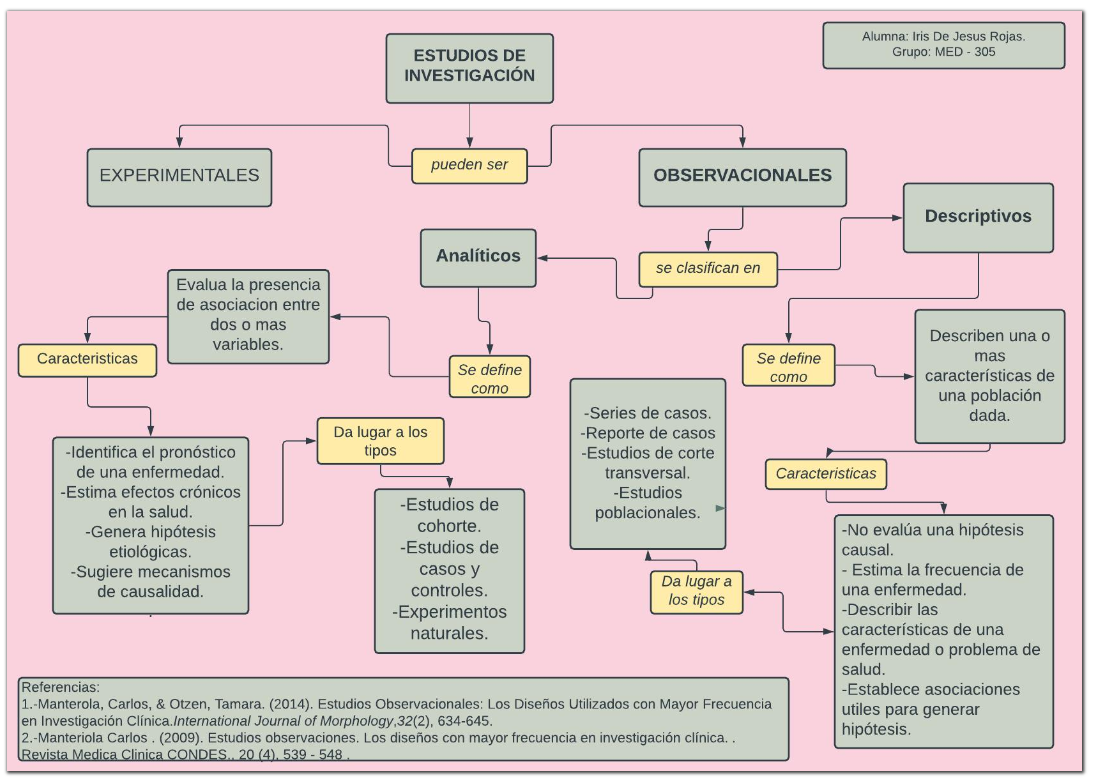

## Proporción en un estudio observacional

### Intervalos de confianza para una proporción

1. Deben leer este [artículo](https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0034-98872005000900017)

2. Vamos a iniciar con un ejemplo. Estamos interesados en la proporción de mujeres que conoce el programa de mamá canguro. Se 520 personas, 320 lo conocen.
3. El margen de error de la estimación de $\hat{p}=\frac{320}{520}=61.53$ viene dado por la expresión
$$\epsilon=Z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

In [ ]:
binom.test(x=320,n=520, conf.level = 0.95 )



	Exact binomial test

data:  320 and 520
number of successes = 320, number of trials = 520, p-value = 1.598e-07
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5720479 0.6574019
sample estimates:
probability of success 
             0.6153846 


In [ ]:
binom.test(x=320,n=520, conf.level = 0.99 )


	Exact binomial test

data:  320 and 520
number of successes = 320, number of trials = 520, p-value = 1.598e-07
alternative hypothesis: true probability of success is not equal to 0.5
99 percent confidence interval:
 0.5585970 0.6700203
sample estimates:
probability of success 
             0.6153846 


In [ ]:
0.6574-0.6153

[1] 0.0421

¿Qué sucede si solo hubieran sido observadas 52 mujeres y 32 lo conocen?

In [ ]:
binom.test(x=32,n=52, conf.level = 0.95 )


	Exact binomial test

data:  32 and 52
number of successes = 32, number of trials = 52, p-value = 0.1263
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4701848 0.7469535
sample estimates:
probability of success 
             0.6153846 


### Tamaños de muestra

1. En el ejemplo anterior se asume que la población es infinita
2. En la vida real, las poblaciones son finitas
3. La formula para el cálculo del tamaño de muestra en un estudio observacional es:
$$n=\frac{NZ^2 p(1-p)}{\epsilon^2 (N-1) + Z^2 p(1-p)}$$

donde $Z$ es el valor de una normal estandar de acuerdo a una confianza dada, N es el tamaño de la población, $p$ es la proporción conocida y $\epsilon$ es un margen de error dado (por defecto $\epsilon=5\%$)


## Relación entre dos variables nominales


Los test exactos calculan la probabilidad de obtener los resultados observados de forma directa generando todos los posibles escenarios y calculando la proporción en los que se cumple la condición estudiada (son test de permutaciones). Los test aproximados calculan primero un estadístico y luego emplean la distribución teórica de dicho estadístico para obtener la probabilidad de que adquiera valores iguales o más extremos.

Existe bastante controversia en cuanto a si se deben de utilizar test exactos o aproximados. En la era pre-computacional, los test exactos se complicaban mucho cuando el tamaño total de muestras aumentaba, sin embargo, por medio de la computación esta barrera se ha eliminado. Los test exactos son más precisos cuando el tamaño total de observaciones es bajo o alguno de los grupos tiene pocas observaciones, una vez alcanzado un número alto de observaciones las diferencias son mínimas. En el libro Handbook of Biological Statistics John H. McDonald se recomienda utilizar test exactos cuando el número total de observaciones es menor a 1000 o cuando, aunque el número total sea mayor a 1000, haya algún grupo cuyo número de eventos esperados sea pequeño (normalmente menor que 5). En el caso de aplicar test aproximados sobre tamaños pequeños se suelen emplear correcciones, las más frecuentes son la corrección de continuidad de Yate o la corrección de William.

Se puede considerar a los test basados el estadístico χ2
 como una generalización del contraste de proporciones basado en la aproximación a la normal (Z-test de una proporción y Z-test de dos proporciones) cuando hay 2 o más variables cualitativas o alguna de ellas tiene 2 o más niveles. En aquellos casos en los que ambos test se pueden aplicar, el resultado de un Z-test y un test χ2
 es equivalente. Esto es debido a que en la distribución chi-cuadrado con 1 grado de libertad el estadístico χ2
 es igual al estadístico Z
 de una distribución normal, elevado al cuadrado.

 Para leer [más](https://rpubs.com/Joaquin_AR/220579)

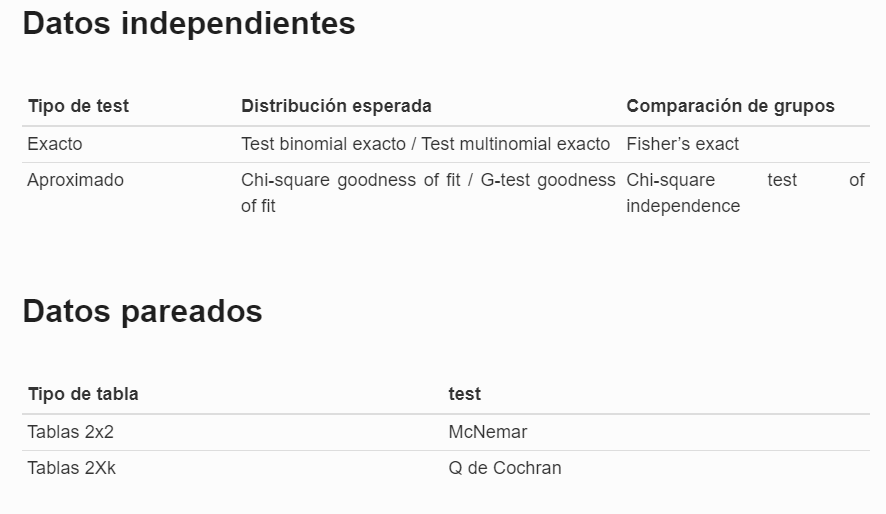

### Prueba $\chi^2$


La prueba de independencia Chi cuadrado permite determinar si existe asociación entre dos variables discretas. Sus supuestos de aplicación son:

1. La muestra es un subconjunto aleatorio de la población.
2. Los valores esperados son mayores o iguales a 5.
3. Las variables discretas poseen menos de 20 niveles cada una.
4. La prueba de independencia Chi cuadrado permite evaluar la siguientes hipótesis:
* $H_0:$ Las variables son independientes
* $H_1:$ las variables están relacionadas
Veamos un ejemplo.

In [ ]:
### Relación entre HighBP y HighChol
fila1 <- c(81,  147)
fila2 <- c(359, 277)
tabla <- as.table(rbind(fila1, fila2))
dimnames(tabla) = list(Peso = c("Obeso","No obeso"),
                       Estado_civil = c("soltero","casado"))
tabla

          Estado_civil
Peso       soltero casado
  Obeso         81    147
  No obeso     359    277

In [ ]:
chisq.test(x = tabla)


	Pearson's Chi-squared test with Yates' continuity correction

data:  tabla
X-squared = 28.56, df = 1, p-value = 9.083e-08


### Test Exacto de Fisher

In [ ]:
fisher.test(x = tabla)


	Fisher's Exact Test for Count Data

data:  tabla
p-value = 5.8e-08
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3065266 0.5880194
sample estimates:
odds ratio 
 0.4255856 


### Coeficiente C de contingencia (Fuerza de la asociación)

Por la cantidad de datos, es muy complejo realizar pruebas de hipotesis

$$C_{Corr}=\sqrt{\frac{k}{k-1}}\sqrt{\frac{\chi^2}{n+\chi^2}}$$

Donde $Chi$ es el valor de la chi cuadrado, n es el número de datos y
$$k=min(Categorias X, Categorias Y)$$


In [ ]:
install.packages("vcd")
library(vcd)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’


Loading required package: grid



In [ ]:
assocstats(tabla)

                    X^2 df   P(> X^2)
Likelihood Ratio 29.687  1 5.0775e-08
Pearson          29.391  1 5.9140e-08

Phi-Coefficient   : 0.184 
Contingency Coeff.: 0.181 
Cramer's V        : 0.184 

### Taller
Realizar la asociación entre Colesterol alto y Presión arterial alta

In [ ]:
library(tidyverse)

In [ ]:
datos = read_csv("https://raw.githubusercontent.com/Cruzalirio/Unal-Enfermeria-/main/Datos/diabetes_BRFSS2015.csv")
### La función head me permite ver las primeras filas
head(datos)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


### Test de Mcnemar


El test de McNemar es la alternativa a los test χ2  de Pearson y al test exacto de Fisher cuando: los datos son pareados, se trata de tablas 2x2 y ambas variables son dicotómicas (binomiales). El test de McNemar estudia si la probabilidad de evento verdadero para una variable es igual en los dos niveles de otra variable.

## Medidas de Asociación 

1. Primer documento [acá](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4640017/#:~:text=The%20relative%20risk%20(also%20known,event%20in%20the%20other%20group.)

2. Segundo documento [acá](https://www.scielo.cl/scielo.php?script=sci_arttext&pid=S0034-98872013001000014)

3. Tercer documento [acá](https://www.cdc.gov/csels/dsepd/ss1978/lesson3/section5.html#:~:text=A%20rate%20ratio%20compares%20the,to%20a%20suspected%20causative%20agent.)

### Introducción

1. ¿Qué es un estudio de cohorte?

2. **¿Qué es un Odds?**: Rutinariamente expresamos la posibilidad de ocurrencia de un evento de interés usando probabilidades. Por ejemplo, si el pronóstico del tiempo anuncia que la probabilidad de lluvia durante junio es 40%, entendemos que es posible que llueva en 12/30 días que tiene dicho mes. Una forma alternativa de representar la posibilidad de ocurrencia de un evento de interés es mediante el uso de odds, definidos como un cociente entre el número de eventos y el número de "no eventos". Siguiendo el ejemplo, el odds de lluvia durante junio corresponde al cociente entre el número de días de lluvia y "no lluvia" de aquel mes, es decir, 12/18. Probabilidades y odds son intercambiables: una probabilidad puede convertirse en odds mediante la fórmula (probabilidad/(1-probabilidad)), y un odds convertirse en una probabilidad mediante la fórmula (odds/(odds+1))

3. **¿Qué es un Odds?** Supongamos que usted está a cargo de la organización de un paseo al aire libre, y duda si realizarlo en junio o noviembre. El pronóstico del tiempo anuncia que la probabilidad de lluvia en noviembre es 10% (es decir, es posible que llueva en 3/30 días que tiene dicho mes), siendo su odds de lluvia equivalente a 3/27. ¿De qué manera compararía la posibilidad de que llueva en junio versus noviembre? 

4. La forma más simple es mediante el cálculo del **Riesgo Relativo (RR)**. En el ejemplo, el RR corresponde al cociente entre la probabilidad de que llueva en junio dividido por la probabilidad de que llueva en noviembre, y equivale a (12/30)/(3/30) = 4,0. Su interpretación es fácilmente comprensible: _"la probabilidad de que llueva en junio es 4,0 veces la probabilidad de que llueva en noviembre"_ (nótese que el término "probabilidad" es intercambiable por "riesgo"). 

5. Análogamente, **Odds Ratio (OR)** se define como un cociente entre dos odds. En el ejemplo, el OR corresponde al odds de que llueva en junio dividido por el odds de que llueva en noviembre, y equivale a (12/18)/(3/27) = 6,0. Su interpretación es un poco más compleja: "la razón de posibles días de lluvia versus "no lluvia" es 6 veces mayor en junio en comparación a noviembre". Notará el lector que tanto el valor del RR como del OR harán optar por organizar el paseo al aire libre durante el mes de noviembre, minimizando así la posibilidad de que la lluvia arruine dicha actividad. 

### Estudio de cohorte

Tomado de [acá](
https://es.wikipedia.org/wiki/Estudio_de_cohorte)
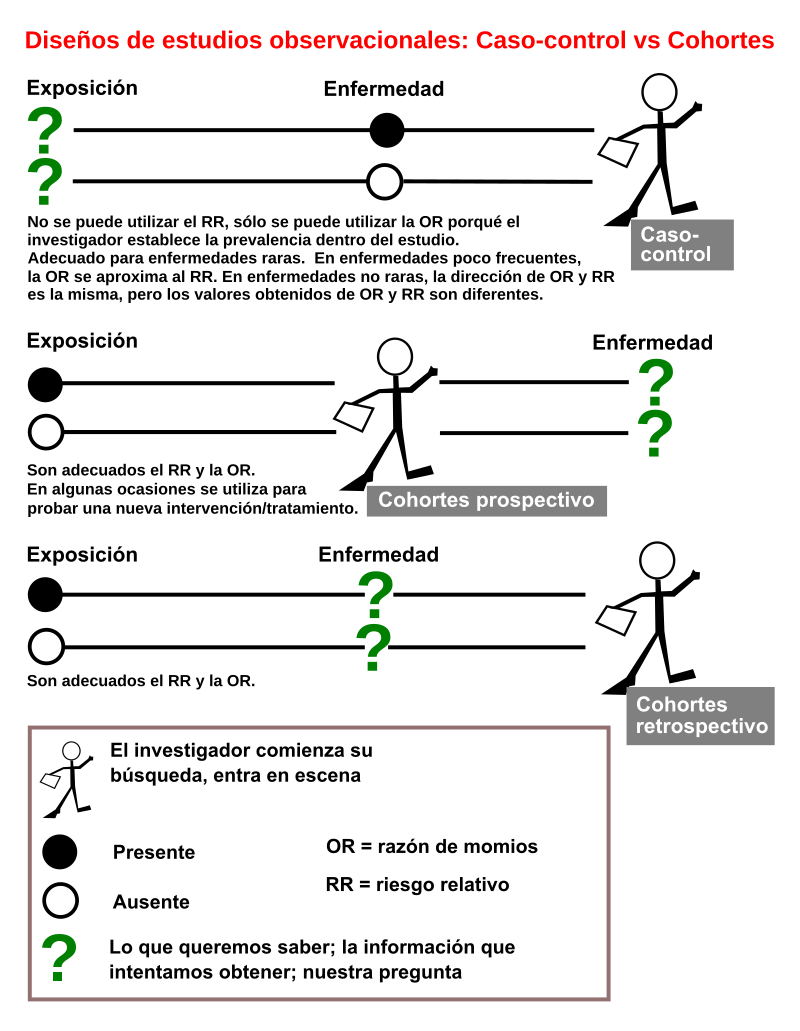

## Paquetes en R para el calculo de Odds Ratio

1. Documentación [acá](https://search.r-project.org/CRAN/refmans/epitools/html/epitab.html#:~:text=The%20epitab%20calculates%20odds%20ratios,%2C%20or%20small%2Dsample%20adjusted.)

In [ ]:
install.packages("epitools")
library(epitools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Factores de riesgo para Stroke
1. HighChol

In [ ]:
tabla = table(datos$HighChol, datos$Stroke)
tabla

   
         0      1
  0 142453   3636
  1 100935   6656

In [ ]:
tabla = table(datos$Sex, datos$Stroke)
tabla

   
         0      1
  0 136288   5686
  1 107100   4606

In [ ]:
rownames(tabla) = c("Female", "Male")
colnames(tabla) = c("Sin ACV", "con ACV")
tabla

        
         Sin ACV con ACV
  Female  136288    5686
  Male    107100    4606

### Razon de riesgo

In [ ]:
RazonRiesgo = epitab(tabla, rev = "n", method = "riskratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2")
RazonRiesgo

,Sin ACV,p0,con ACV,p1,riskratio,lower,upper,p.value
Colesterol normal,142453,0.9751111,3636,0.02488894,1.000000,NA,NA,NA
Colesterol alto,100935,0.9381361,6656,0.06186391,2.484932,2.388347,2.585424,0


### Razon de Odds

In [ ]:
RazonOdds = epitab(tabla, rev = "n", method = "oddsratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2")
RazonOdds

,Sin ACV,p0,con ACV,p1,oddsratio,lower,upper,p.value
No fumador,137047,0.5630803,4210,0.4090556,1.000000,NA,NA,NA
Fumador,106341,0.4369197,6082,0.5909444,1.861786,1.788666,1.938012,1.888013e-208


### Otro ejemplo

-------------------------- EPOC-----------

-------------------- No -------- Sí -------

No Fumador-- 150 ------33 ---------------

Fumador  --- 70 ------ 60 --------------


In [ ]:
datos = matrix(c(150,33,70,150), ncol=2, nrow=2, byrow = TRUE)
datos = as.table(datos)
datos

    A   B
A 150  33
B  70 150

In [ ]:
rownames(datos) = c("No fumador", "Fumador")
colnames(datos) = c("No EPOC", "EPOC")
datos

           No EPOC EPOC
No fumador     150   30
Fumador         30  150

In [ ]:
RazonOdds = epitab(datos, rev = "n", method = "oddsratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2", conf.level=0.95)
RazonOdds

,No EPOC,p0,EPOC,p1,oddsratio,lower,upper,p.value
No fumador,150,0.8333333,30,0.1666667,1.00000,NA,NA,NA
Fumador,30,0.1666667,150,0.8333333,24.56211,14.32451,43.60619,1.131484e-36


In [ ]:
RazonOdds = epitab(datos, rev = "c", method = "oddsratio",
                    oddsratio="midp", riskratio = "small",
                    rateratio = "midp",
                    pvalue="chi2", conf.level=0.99999999)
RazonOdds

,EPOC,p0,No EPOC,p1,oddsratio,lower,upper,p.value
No fumador,30,0.3333333,150,0.6818182,1.0000000,NA,NA,NA
Fumador,60,0.6666667,70,0.3181818,0.2350723,0.04550235,1.033328,1.661139e-08
